## 动态规划 价值迭代

### Example 4.3 with Exercises 4.8-4.10 and Figure 4.3

### 赌徒问题

s: 赌资 0-100

a: 赌注 min(赌资，100-赌资)

r: 获利100美元 +1 否则为0

env: 游戏规则，如果抛的硬币正面朝上，赌徒获得这一次下注的钱
     如果抛的硬币背面朝上，则失去这一次下注的钱
     
policy: 赌资到赌注的映射

value function: 在每个状态下赌徒获胜的概率

In [3]:
import numpy as np
import matplotlib.pyplot as plt


rewards = np.zeros(101)
rewards[100] = 1 

def value_iteration(ph=0.4, theta=0.000001, discount_factor=1):
    '''
        value iteration : 一直迭代至收敛，获得准确的value function
                          根据准确的value function选择最好的action
    '''
    V = np.zeros(101)
    while True:
        delta = 0
        for s in range(1, 100):  # for each state
            old_v = V[s]       
            r = 0
            
            
            nA = min(s, 100 - s) + 1#最大赌注动态变化
            #print("nA: ", nA)
            values = np.zeros(nA) # 投出每一个可能的赌注
            for a in range(1, nA):
                #print("a: ", a)
                values[a] = ph * (rewards[s+a] + V[s+a]*discount_factor) + \
                           (1-ph) * (rewards[s-a] + V[s-a]*discount_factor)

            best_a = np.max(values)
            delta = max(delta, np.abs(best_a - old_v))
            V[s] = best_a
        if delta < theta:
            break
            
    #value table收敛后 使用贪心策略获得policy 
    policy = np.zeros(100)
    for s in range(1, 100):
        nA = min(s, 100 - s) + 1
        values = np.zeros(nA)
        for a in range(1, nA):
            values[a] = ph * (rewards[s+a] + V[s+a]*discount_factor) + \
                        (1-ph) * (rewards[s-a] + V[s-a]*discount_factor)
        best_a = np.argmax(values) 
        policy[s] = best_a
    return V, policy
    
    


In [81]:
value_table, policy = value_iteration()

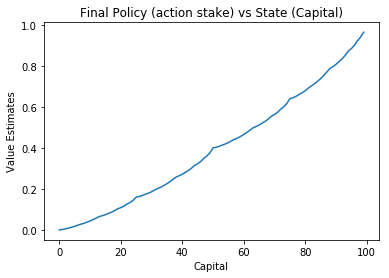

In [82]:
# Plotting Final Policy (action stake) vs State (Capital)

x = range(100)
y = value_table[:100]
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Final Policy (action stake) vs State (Capital)')
plt.show()

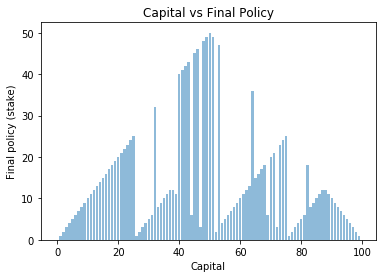

In [83]:
# Plotting Capital vs Final Policy

x = range(100)
y = policy
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Capital vs Final Policy')
plt.show()

### 4.9

In [1]:
def train(ph=0.4, Theta=0.000001):
    V = [0]*100
    for i in range(0, 100):
        V[i] = np.random.random() * 1000
    V[0] = 0
    pi = [0]*100
    counter = 1
    while True:
        Delta = 0
        for s in range(1, 100):  # for each state
            old_v = V[s]
            v = [0] * 51
            for a in range(1, min(s, 100 - s) + 1):
                v[a] = 0
                if a + s < 100:
                    v[a] += ph * (0 + V[s + a])
                    v[a] += (1 - ph) * (0 + V[s - a])
                elif a + s == 100:
                    v[a] += ph
                    v[a] += (1 - ph) * (0 + V[s - a])
            op_a = np.argmax(v)
            pi[s] = op_a
            V[s] = v[op_a]
            Delta = max(Delta, abs(old_v - V[s]))
        counter += 1
        if counter % 1000 == 0:
            print("train loop" + str(counter))
            print("Delta =" + str(Delta))
        if Delta < Theta:
            break
    return [V[1:100], pi[1:100]]



In [ ]:
plt.figure(12,figsize=(13,4))
plt.subplot(121)
plt.xlabel('state')
plt.ylabel('predicted total time')
plt.title("MC prediction")

plt.plot(state, real_time, c='blue', marker='o')
plt.plot(state, mc_result, c='red', marker='o', linestyle='--' )
#plt.subplot

plt.subplot(122)
plt.xlabel('state')
plt.ylabel('predicted total time')
plt.title("TD prediction")

plt.plot(state, real_time, c='blue', marker='o')
plt.plot(state, td_result, c='red', marker='o', linestyle='--' )
plt.show()

train loop1000
Delta =0.2710876585687174
train loop2000
Delta =0.01007493320310937
train loop3000
Delta =0.00035640158503569275
train loop4000
Delta =7.6022662618413506e-06


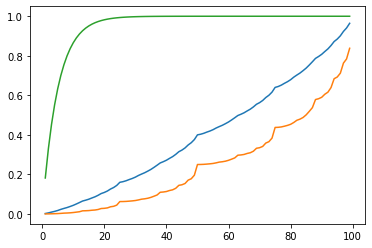

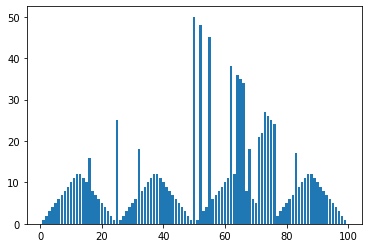

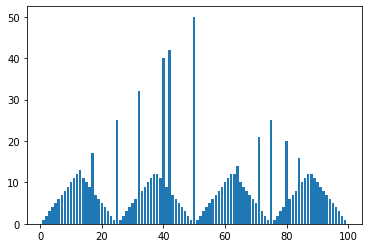

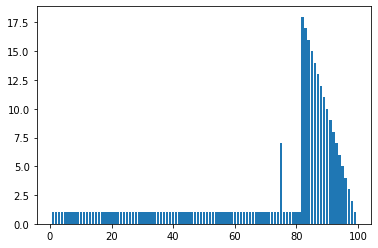

In [4]:

[V1, pi1] = train(ph=0.4)
[V2, pi2] = train(ph=0.25)
[V3, pi3] = train(ph=0.55)
S = np.linspace(1, 99, num=99, endpoint=True)
plt.figure(22)
plt.subplot(221)
plt.plot(S, V1)
plt.plot(S, V2)
plt.plot(S, V3)
#plt.show()
plt.subplot(222)
plt.figure()
plt.bar(S, pi1)
#plt.show()
#plt.figure()
plt.subplot(223)
plt.bar(S, pi2)
#plt.show()
#plt.figure()
plt.subplot(224)
plt.bar(S, pi3)
plt.show()

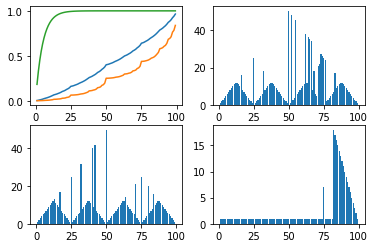

In [6]:
plt.figure(22)
plt.subplot(221)
plt.plot(S, V1)
plt.plot(S, V2)
plt.plot(S, V3)
#plt.show()
plt.subplot(222)
#plt.figure()
plt.bar(S, pi1)
#plt.show()
#plt.figure()
plt.subplot(223)
plt.bar(S, pi2)
#plt.show()
#plt.figure()
plt.subplot(224)
plt.bar(S, pi3)
plt.show()

In [85]:
#基于gym的模拟环境 
#由于 action空间动态变化 不方便在其之上使用DP算法

import gym
import numpy as np

class GamberEnv(gym.Env):
    def __init__(self):
        self.state = 100 #赌资
        self.pool = 0   #赌注  
        self.profit = 0 #回报
        self.ph = 0.4 #正面朝上的概率

    def step(self, a): 
        r = 0
        done = False
        
        if np.random.random() < self.ph: 
            self.profit += a   #正面朝上 赢得赌注
        else:
            self.profit -= a #反面朝上 输
            
        if self.profit == 100 : #完成目标
            r = 1
            done = True
            
        self.state += self.profit 
        
        if self.state<0: #输光了
            done = True
            
        info = {"current money": self.state, "profit": self.profit}
        return self.state, r, done, info
    
    def reset():
        self.state = 100
        return self.state
        
        